In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

In [3]:
# Connect with database

conn = sql.connect("sales_data.db")

In [31]:
cursor = conn.cursor()

cursor.execute("CREATE TABLE Sales(OrderID TEXT, OrderDate TEXT, CustomerName TEXT, Country TEXT, City TEXT, State TEXT, PostalCode INTEGER, ProductID TEXT, Category TEXT, ProductName TEXT, Qty INTEGER, Price REAL)")

In [33]:
#  Loading the data

import csv

with open("Sales_Table.csv", "r") as file:
    reader = csv.reader(file)
    next(reader) # Skip the first row

    for row in reader: 
        cursor.execute("INSERT INTO Sales (OrderID, OrderDate, CustomerName, Country, City, State, PostalCode, ProductID, Category, ProductName, Qty, Price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11]))
        conn.commit()

In [36]:
# Selecting data from the table

Query = "SELECT Category, SUM(Qty) AS TotalQty, SUM(Qty*Price) AS Revenue FROM SALES GROUP BY Category"

df = pd.read_sql_query(Query, conn)

print(df)

          Category  TotalQty    Revenue
0        Furniture      8028  741996.85
1  Office Supplies     22906  719032.52
2       Technology      6939  836148.40


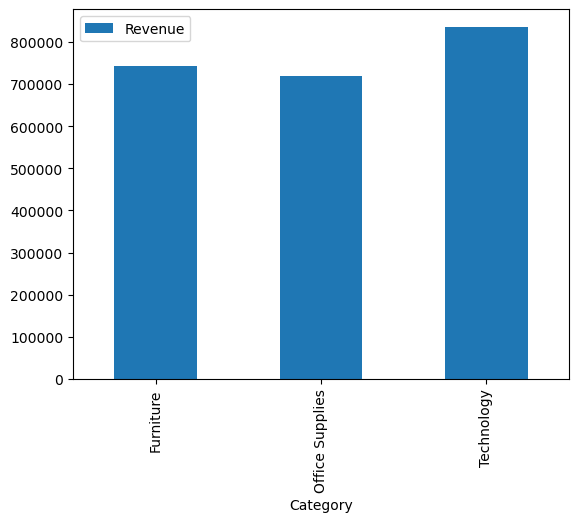

In [38]:
# Plotting the chart

df.plot(kind="bar", x="Category", y="Revenue")

plt.savefig("Sales_Chart.png")

In [39]:
conn.close()